<a href="https://colab.research.google.com/github/jeslinpjames/RegressionAnalysis/blob/main/MultipleLinearRegressionNvidiaStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install plotly


[*********************100%***********************]  1 of 1 completed


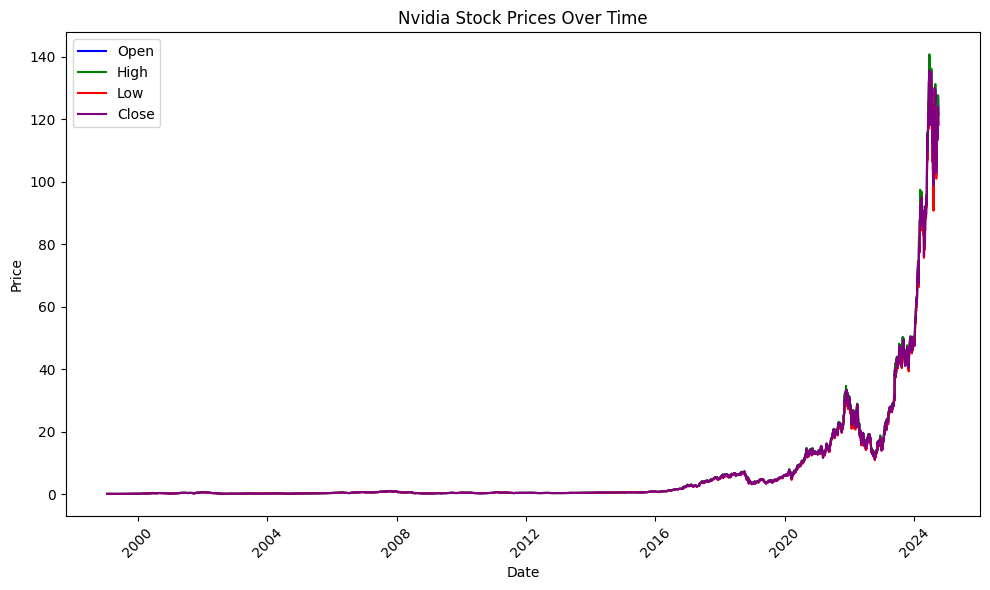

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Nvidia stock data from Yahoo Finance (from the beginning to today)
nvidia_data = yf.download('NVDA', start='1999-01-01')

# Plot the data: Open, High, Low, Close prices over time
plt.figure(figsize=(10, 6))

plt.plot(nvidia_data.index, nvidia_data['Open'], label='Open', color='blue')
plt.plot(nvidia_data.index, nvidia_data['High'], label='High', color='green')
plt.plot(nvidia_data.index, nvidia_data['Low'], label='Low', color='red')
plt.plot(nvidia_data.index, nvidia_data['Close'], label='Close', color='purple')

# Adding title and labels
plt.title('Nvidia Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()


              Open         High          Low        Close    Adj Close  \
count  6464.000000  6464.000000  6464.000000  6464.000000  6464.000000   
mean      6.937770     7.068797     6.796762     6.939117     6.912354   
std      18.406063    18.762463    17.999518    18.397131    18.399190   
min       0.034896     0.035547     0.033333     0.034115     0.031289   
25%       0.278500     0.286729     0.271188     0.278406     0.255340   
50%       0.460000     0.467000     0.453000     0.461125     0.430754   
75%       4.313125     4.350438     4.234750     4.284000     4.251345   
max     139.800003   140.759995   132.419998   135.580002   135.568405   

             Volume  
count  6.464000e+03  
mean   6.043448e+08  
std    4.314808e+08  
min    1.968000e+07  
25%    3.442440e+08  
50%    5.055630e+08  
75%    7.351170e+08  
max    9.230856e+09  


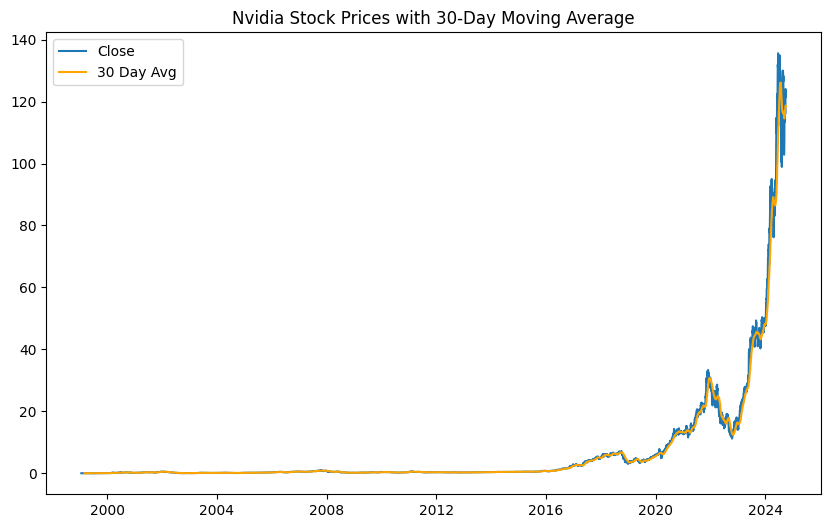

In [ ]:
# Descriptive statistics
print(nvidia_data.describe())

# Rolling mean (e.g., 30-day window)
nvidia_data['30 Day Avg'] = nvidia_data['Close'].rolling(window=30).mean()

# Plot with rolling mean
plt.figure(figsize=(10, 6))
plt.plot(nvidia_data.index, nvidia_data['Close'], label='Close')
plt.plot(nvidia_data.index, nvidia_data['30 Day Avg'], label='30 Day Avg', color='orange')
plt.title('Nvidia Stock Prices with 30-Day Moving Average')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the features (Open, High, Low, Volume) and target (Close)
X = nvidia_data[['Open', 'High', 'Low', 'Volume']]
y = nvidia_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.04523069090387812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6464
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6619.980
Date:                Tue, 01 Oct 2024   AIC                          13251.960
Time:                        06:06:08   BIC                          13292.603
Sample:                             0   HQIC                         13266.021
                               - 6464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0834      0.002    -33.512      0.000      -0.088      -0.079
ar.L2          0.0717      0.002     31.459      0.000       0.067       0.076
ar.L3         -0.0102      0.003     -3.763      0.0

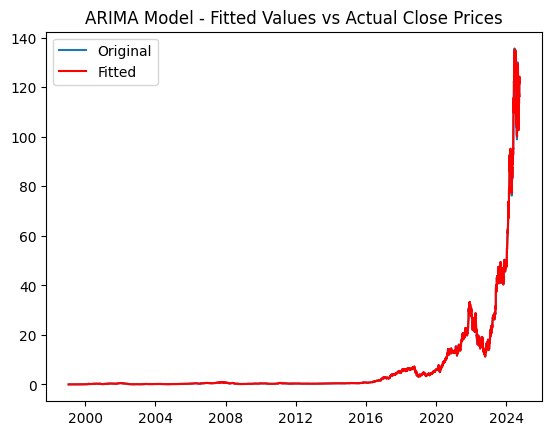

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (ARIMA(p,d,q), where p is autoregression, d is difference, q is moving average)
model = ARIMA(nvidia_data['Close'], order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the fitted values
plt.plot(nvidia_data['Close'], label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('ARIMA Model - Fitted Values vs Actual Close Prices')
plt.show()


In [ ]:
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days
print(forecast)


6464    121.157168
6465    121.109187
6466    120.924657
6467    121.071483
6468    121.029340
6469    121.056592
6470    121.042250
6471    121.062790
6472    121.050286
6473    121.056484
6474    121.052751
6475    121.055442
6476    121.053205
6477    121.054571
6478    121.053764
6479    121.054280
6480    121.053913
6481    121.054172
6482    121.054008
6483    121.054111
6484    121.054043
6485    121.054090
6486    121.054059
6487    121.054079
6488    121.054066
6489    121.054075
6490    121.054069
6491    121.054073
6492    121.054070
6493    121.054072
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 0.08676702234038597


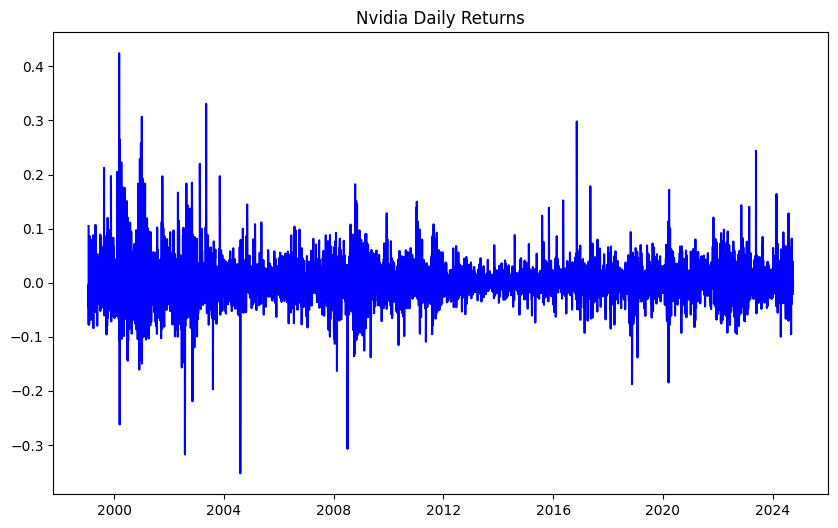

In [ ]:
nvidia_data['Daily_Return'] = nvidia_data['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(nvidia_data.index, nvidia_data['Daily_Return'], label='Daily Return', color='blue')
plt.title('Nvidia Daily Returns')
plt.show()


In [ ]:
import yfinance as yf
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Fetch Nvidia stock data from Yahoo Finance
nvidia_data = yf.download('NVDA', start='1999-01-01')

# Prepare features and target for regression models
X = nvidia_data[['Open', 'High', 'Low', 'Volume']].fillna(0)  # Filling missing values
y = nvidia_data['Close'].fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ARIMA Model
model_arima = ARIMA(nvidia_data['Close'], order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
model_arima_fit = model_arima.fit()
nvidia_data['ARIMA_Predicted'] = model_arima_fit.fittedvalues

# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
nvidia_data['Linear_Regression_Predicted'] = linear_model.predict(X)

# Polynomial Regression (degree=3)
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
nvidia_data['Polynomial_Regression_Predicted'] = poly_model.predict(poly_features.fit_transform(X))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
nvidia_data['Ridge_Regression_Predicted'] = ridge_model.predict(X)

# Lasso Regression
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train, y_train)
nvidia_data['Lasso_Regression_Predicted'] = lasso_model.predict(X)

# Create interactive plot
fig = make_subplots(rows=1, cols=1)

# Plot original data (Close prices)
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Close'], mode='lines', name='Original Close'))

# Plot ARIMA predicted data
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['ARIMA_Predicted'], mode='lines', name='ARIMA Predicted'))

# Plot Linear Regression predicted data
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Linear_Regression_Predicted'], mode='lines', name='Linear Regression Predicted'))

# Plot Polynomial Regression predicted data
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Polynomial_Regression_Predicted'], mode='lines', name='Polynomial Regression Predicted'))

# Plot Ridge Regression predicted data
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Ridge_Regression_Predicted'], mode='lines', name='Ridge Regression Predicted'))

# Plot Lasso Regression predicted data
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Lasso_Regression_Predicted'], mode='lines', name='Lasso Regression Predicted'))

# Update layout for better visualization
fig.update_layout(
    title='Nvidia Stock Prices with Multiple Models Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x unified',
    showlegend=True
)

# Enable zooming, panning, and interaction
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.60164e-19): result may not be accurate.



In [ ]:
import pandas as pd

# Evaluation Metrics Function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"MSE": mse, "MAE": mae, "RMSE": rmse, "R²": r2, "MAPE": mape}

# Evaluate all models
metrics_linear = evaluate_model(y_test, y_pred_linear)
metrics_arima = evaluate_model(y_test, y_pred_arima)
metrics_poly = evaluate_model(y_test, y_pred_poly)
metrics_ridge = evaluate_model(y_test, y_pred_ridge)
metrics_lasso = evaluate_model(y_test, y_pred_lasso)

# Combine results in a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "RMSE", "R²", "MAPE"],
    "Linear Regression": [metrics_linear['MSE'], metrics_linear['MAE'], metrics_linear['RMSE'], metrics_linear['R²'], metrics_linear['MAPE']],
    "ARIMA": [metrics_arima['MSE'], metrics_arima['MAE'], metrics_arima['RMSE'], metrics_arima['R²'], metrics_arima['MAPE']],
    "Polynomial Regression": [metrics_poly['MSE'], metrics_poly['MAE'], metrics_poly['RMSE'], metrics_poly['R²'], metrics_poly['MAPE']],
    "Ridge Regression": [metrics_ridge['MSE'], metrics_ridge['MAE'], metrics_ridge['RMSE'], metrics_ridge['R²'], metrics_ridge['MAPE']],
    "Lasso Regression": [metrics_lasso['MSE'], metrics_lasso['MAE'], metrics_lasso['RMSE'], metrics_lasso['R²'], metrics_lasso['MAPE']]
})

# Display the metrics comparison table
print(metrics_df)

# Find the best model based on Mean Squared Error (MSE)
best_model = metrics_df.loc[metrics_df['Metric'] == 'MSE'].set_index('Metric').idxmin(axis=1).values[0]
best_model_mse = metrics_df.loc[metrics_df['Metric'] == 'MSE'][best_model].values[0]

print(f"\nThe best model is: {best_model} with an MSE of {best_model_mse}")


  Metric  Linear Regression       ARIMA  Polynomial Regression  \
0    MSE           0.045231  334.635511               0.047627   
1    MAE           0.060543    7.879057               0.063906   
2   RMSE           0.212675   18.293045               0.218236   
3     R²           0.999862   -0.024247               0.999854   
4   MAPE           1.382606         NaN               2.865827   

   Ridge Regression  Lasso Regression  
0          0.054285          0.079607  
1          0.068685          0.102066  
2          0.232991          0.282147  
3          0.999834          0.999756  
4          1.134321         13.045107  

The best model is: Linear Regression with an MSE of 0.045230690846509825


<ipython-input-18-b7553689dd39>:9: RuntimeWarning:

'<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.

<ipython-input-18-b7553689dd39>:9: RuntimeWarning:

'<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.

